In [1]:
import pandas as pd
import numpy as np

# MultiIndex Objects

 a MultiIndex (also called a hierarchical index) allows you to have multiple index levels on a DataFrame or Series. This is very useful when working with grouped data, panel data, or any kind of multi-dimensional data in tabular form.

Series is 1D object and Dataframe is 2D object 

in series,we move row wise and in dataframe, we move both row and column wise

## 1. MultiIndex Series

### can we have MultiIndex? 

In [2]:
index_val = [("CIS",2025),("CIS",2024),("CIS",2023),("CIS",2022),("CS",2025),("CS",2024),("CS",2023),("CS",2022)]
a = pd.Series([1,2,3,4,5,6,7,8],index=index_val)
a

(CIS, 2025)    1
(CIS, 2024)    2
(CIS, 2023)    3
(CIS, 2022)    4
(CS, 2025)     5
(CS, 2024)     6
(CS, 2023)     7
(CS, 2022)     8
dtype: int64

In [3]:
a[('CIS',2023)]

3

### The probelm?
what if we want to access all the values of index CIS

In [4]:
#a["CIS"]

Here, we somehow made multiindex but both levels depends on each other rather than being independent as we want multiple column index not the index thats contains multiple values for a single index like tuple,array etc

### The Solution
* multiindex series also known as hierarichal indexing(like parent child)
* mutliple index level with in a index

### How to make a multiindex object

#### 1.pd.MultiIndex.from_tuple()
Creates a MultiIndex from a list of tuples.

In [5]:
index_val = [("CIS",2025),("CIS",2024),("CIS",2023),("CIS",2022),("CS",2025),("CS",2024),("CS",2023),("CS",2022)]
multiindex = pd.MultiIndex.from_tuples(index_val)
multiindex

MultiIndex([('CIS', 2025),
            ('CIS', 2024),
            ('CIS', 2023),
            ('CIS', 2022),
            ( 'CS', 2025),
            ( 'CS', 2024),
            ( 'CS', 2023),
            ( 'CS', 2022)],
           )

In [6]:
#levels
multiindex.levels

FrozenList([['CIS', 'CS'], [2022, 2023, 2024, 2025]])

In [7]:
#1st level
multiindex.levels[0]

Index(['CIS', 'CS'], dtype='object')

In [8]:
#2nd level
multiindex.levels[1]

Index([2022, 2023, 2024, 2025], dtype='int64')

#### 2.pd.MultiIndex.from_product()
Creates a MultiIndex from the Cartesian product of iterables.

In [9]:
pd.MultiIndex.from_product([["CIS","CS"],[2025,2024,2023,2022]])

MultiIndex([('CIS', 2025),
            ('CIS', 2024),
            ('CIS', 2023),
            ('CIS', 2022),
            ( 'CS', 2025),
            ( 'CS', 2024),
            ( 'CS', 2023),
            ( 'CS', 2022)],
           )

#### 3.pd.MultiIndex.from_arrays()
This method creates a MultiIndex from a list of arrays, where each array corresponds to a level of the index.

In [10]:
array = [["CIS","CIS","CIS","CIS","CS","CS","CS","CS"],[2025,2024,2023,2022,2025,2024,2023,2022]]
pd.MultiIndex.from_arrays(array)

MultiIndex([('CIS', 2025),
            ('CIS', 2024),
            ('CIS', 2023),
            ('CIS', 2022),
            ( 'CS', 2025),
            ( 'CS', 2024),
            ( 'CS', 2023),
            ( 'CS', 2022)],
           )

#### 4.pd.MultiIndex.from_frame()
This method creates a MultiIndex directly from a DataFrame, where each column becomes one level of the index.

In [11]:
df = pd.DataFrame([
    ["CIS",2025],
    ["CIS",2024],
    ["CIS",2023],
    ["CIS",2022],
    ["CS",2025],
    ["CS",2024],
    ["CS",2023],
    ["CS",2022]
])
pd.MultiIndex.from_frame(df)

MultiIndex([('CIS', 2025),
            ('CIS', 2024),
            ('CIS', 2023),
            ('CIS', 2022),
            ( 'CS', 2025),
            ( 'CS', 2024),
            ( 'CS', 2023),
            ( 'CS', 2022)],
           names=[0, 1])

### Creaing a multiindex series

In [12]:
s = pd.Series([1,2,3,4,5,6,7,8],index=multiindex)
s

CIS  2025    1
     2024    2
     2023    3
     2022    4
CS   2025    5
     2024    6
     2023    7
     2022    8
dtype: int64

### Fetching rows

In [13]:
s[("CIS",2023)]

3

In [14]:
s["CIS"]

2025    1
2024    2
2023    3
2022    4
dtype: int64

In [15]:
s["CS",2023]

7

### unstack()
* Moves the inner level(s) of row index to columns.
* Converts a Series or DataFrame from long to wide format.

In [16]:
temp = s.unstack()
temp

,2022,2023,2024,2025
CIS,4,3,2,1
CS,8,7,6,5


converts level 0 into index and level 1 into columns 

### stack()
* Opposite of unstack()
* Moves columns to become inner row index levels
* Converts wide back to long

In [17]:
temp.stack()

CIS  2022    4
     2023    3
     2024    2
     2025    1
CS   2022    8
     2023    7
     2024    6
     2025    5
dtype: int64

### Why?
No matter how higher dimension(4D,9D,...) the data is we can represent it in series or dataframe

## 2. MultiIndex DataFrame

In [18]:
multiindex.names=["Branch","Batch"]
branch_df1 = pd.DataFrame({
    "Avg Package":[3.2,4.1,4.3,2.4,6.4,3.2,4.6,6.4],
    "Students" : [120,125,122,127,50,54,56,54]
},index=multiindex)
branch_df1

Avg Package  Students
Branch Batch                       
CIS    2025           3.2       120
       2024           4.1       125
       2023           4.3       122
       2022           2.4       127
CS     2025           6.4        50
       2024           3.2        54
       2023           4.6        56
       2022           6.4        54

In [19]:
branch_df1.loc["CIS"]

,Avg Package,Students
Batch,,
2025,3.2,120
2024,4.1,125
2023,4.3,122
2022,2.4,127


In [20]:
branch_df1.loc[:,"Avg Package"]

Branch  Batch
CIS     2025     3.2
        2024     4.1
        2023     4.3
        2022     2.4
CS      2025     6.4
        2024     3.2
        2023     4.6
        2022     6.4
Name: Avg Package, dtype: float64

In [21]:
# branch_df1.loc[["CIS",2023],"Avg Package"]->can not use list to show multiindex we have to use tuple for that purpose
branch_df1.loc[("CIS",2023),"Avg Package"]

4.3

In [22]:
branch_df1["Students"]

Branch  Batch
CIS     2025     120
        2024     125
        2023     122
        2022     127
CS      2025      50
        2024      54
        2023      56
        2022      54
Name: Students, dtype: int64

### Are columns really different from index?
Yes — columns and index are conceptually and structurally different in pandas, though they are both types of labels.
 but the code in panda, doesn't represent them separately

This means that we can apply the logic of multiindex to columns making them multicolumns

In [23]:
branch_df1.T

Branch         CIS                         CS                  
Batch         2025   2024   2023   2022  2025  2024  2023  2022
Avg Package    3.2    4.1    4.3    2.4   6.4   3.2   4.6   6.4
Students     120.0  125.0  122.0  127.0  50.0  54.0  56.0  54.0

### MultiIndex df from columns perspective

In [24]:
branch_df2 = pd.DataFrame([
    [3.2,4.1,4.3,2.4,6.4,3.2,4.6,6.4],
    [120,125,122,127,50,54,56,54]
],columns=multiindex,index = ["Avg Package","Students"])
branch_df2.index.name = "NED"
branch_df2

Branch         CIS                         CS                  
Batch         2025   2024   2023   2022  2025  2024  2023  2022
NED                                                            
Avg Package    3.2    4.1    4.3    2.4   6.4   3.2   4.6   6.4
Students     120.0  125.0  122.0  127.0  50.0  54.0  56.0  54.0

In [25]:
branch_df2["CIS"]

Batch,2025,2024,2023,2022
NED,,,,
Avg Package,3.2,4.1,4.3,2.4
Students,120.0,125.0,122.0,127.0


In [26]:
branch_df2["CIS"][2025]

NED
Avg Package      3.2
Students       120.0
Name: 2025, dtype: float64

In [27]:
branch_df2.loc["Avg Package"]#->returns multiindex series

Branch  Batch
CIS     2025     3.2
        2024     4.1
        2023     4.3
        2022     2.4
CS      2025     6.4
        2024     3.2
        2023     4.6
        2022     6.4
Name: Avg Package, dtype: float64

In pandas, DataFrame is always 2D structure and using multiindex, it mimics 3D structure

### Multiindex in terms of both cols and rows

In [28]:
branch_df3 = pd.DataFrame(
    [
        [4.3,130,4.1,123],
        [3.9,167,2.6,112],
        [5.3,143,3.4,123],
        [4.3,123,4.3,132],
        [3.3,50,5.1,53],
        [3.9,57,5.6,52],
        [4.3,43,4.4,43],
        [5.3,53,6.3,52]
    ],
    index = multiindex,
    columns = pd.MultiIndex.from_product([["Karachi","Barcalona"],["Avg PAckage","Students"]])
)
branch_df3.index.name = "NED"
branch_df3.columns.name = "Campus"
branch_df3

Karachi            Barcalona         
             Avg PAckage Students Avg PAckage Students
Branch Batch                                          
CIS    2025          4.3      130         4.1      123
       2024          3.9      167         2.6      112
       2023          5.3      143         3.4      123
       2022          4.3      123         4.3      132
CS     2025          3.3       50         5.1       53
       2024          3.9       57         5.6       52
       2023          4.3       43         4.4       43
       2022          5.3       53         6.3       52

In [29]:
branch_df3.loc[("CIS",2023),("Karachi","Students")]

143

In [30]:
branch_df3["Karachi"]["Students"][("CIS",2023)]

143

### What we learnt?
So,we learn that no matter how big dimensional of a data we have, we can still represent it in multiindex objects because it can mimic the .
simply means that we can use multiindex object to represent higher dimensional data into lower

### Stacking and Unstacking

* stack()    Moves (default = lower) columns to a lower row level	
* unstack()    Moves a (default = lower) row index level to become columns

In [31]:
branch_df3.unstack().unstack().unstack().unstack().unstack().unstack().unstack().unstack()

Barcalona              Karachi         
             Avg PAckage Students Avg PAckage Students
Branch Batch                                          
CIS    2022          4.3    132.0         4.3    123.0
       2023          3.4    123.0         5.3    143.0
       2024          2.6    112.0         3.9    167.0
       2025          4.1    123.0         4.3    130.0
CS     2022          6.3     52.0         5.3     53.0
       2023          4.4     43.0         4.3     43.0
       2024          5.6     52.0         3.9     57.0
       2025          5.1     53.0         3.3     50.0

Here, we can see that no index remains in place of index and it converts the columns into multiindex

In [32]:
branch_df1.unstack().unstack()

             Batch  Branch
Avg Package  2022   CIS         2.4
                    CS          6.4
             2023   CIS         4.3
                    CS          4.6
             2024   CIS         4.1
                    CS          3.2
             2025   CIS         3.2
                    CS          6.4
Students     2022   CIS       127.0
                    CS         54.0
             2023   CIS       122.0
                    CS         56.0
             2024   CIS       125.0
                    CS         54.0
             2025   CIS       120.0
                    CS         50.0
dtype: float64

Now, using stack on it (stack: converts columns into lower level row index) and when applid on series it gives error like below

In [33]:
# branch_df1.unstack().unstack().stack()

let's see the functionality of stack,

In [34]:
branch_df1.unstack().stack(future_stack=True) # we used future_stack=True b/c it uses new, faster and better way to implement the stack function

Avg Package  Students
Branch Batch                       
CIS    2022           2.4       127
       2023           4.3       122
       2024           4.1       125
       2025           3.2       120
CS     2022           6.4        54
       2023           4.6        56
       2024           3.2        54
       2025           6.4        50

If, we stack a dataframe and there is no column left then it will become series

In [35]:
branch_df1.stack()

Branch  Batch             
CIS     2025   Avg Package      3.2
               Students       120.0
        2024   Avg Package      4.1
               Students       125.0
        2023   Avg Package      4.3
               Students       122.0
        2022   Avg Package      2.4
               Students       127.0
CS      2025   Avg Package      6.4
               Students        50.0
        2024   Avg Package      3.2
               Students        54.0
        2023   Avg Package      4.6
               Students        56.0
        2022   Avg Package      6.4
               Students        54.0
dtype: float64

#### IMPORTANT NOTES:
* Unstack:
     - If we apply unstack $no. of multiindex row indexs$ times, it becomes series.
     - If we apply unstack $no. of multiindex columns + no. of multiindex row indexs$ times, the columns of df becomes row index and row index becomes columns.
     - If we apply unstack $2*(no. of multiindex columns + no. of multiindex row indexs)$ times, it becomes the original df.
* Stack:
     - If we apply stack $no. of multiindex columns$ times then, it becomes series and we try more then it will give error because stack doesn't apply on series.
* In pandas 2.1+, use future_stack=True and future_unstack=True with .stack() and .unstack() to avoid deprecation warnings and adopt the newer, faster implementation.

In [36]:
branch_df2.stack()

C:\Users\AK\AppData\Local\Temp\ipykernel_6372\3132666484.py:1: FutureWarning: The previous implementation of stack is deprecated and will be removed in a future version of pandas. See the What's New notes for pandas 2.1.0 for details. Specify future_stack=True to adopt the new implementation and silence this warning.
  branch_df2.stack()


Branch               CIS    CS
NED         Batch             
Avg Package 2022     2.4   6.4
            2023     4.3   4.6
            2024     4.1   3.2
            2025     3.2   6.4
Students    2022   127.0  54.0
            2023   122.0  56.0
            2024   125.0  54.0
            2025   120.0  50.0

In [37]:
branch_df2.stack().stack()

C:\Users\AK\AppData\Local\Temp\ipykernel_6372\2534568903.py:1: FutureWarning: The previous implementation of stack is deprecated and will be removed in a future version of pandas. See the What's New notes for pandas 2.1.0 for details. Specify future_stack=True to adopt the new implementation and silence this warning.
  branch_df2.stack().stack()


NED          Batch  Branch
Avg Package  2022   CIS         2.4
                    CS          6.4
             2023   CIS         4.3
                    CS          4.6
             2024   CIS         4.1
                    CS          3.2
             2025   CIS         3.2
                    CS          6.4
Students     2022   CIS       127.0
                    CS         54.0
             2023   CIS       122.0
                    CS         56.0
             2024   CIS       125.0
                    CS         54.0
             2025   CIS       120.0
                    CS         50.0
dtype: float64

In [38]:
branch_df3.unstack()

Karachi                                          Barcalona       \
       Avg PAckage                Students                Avg PAckage        
Batch         2022 2023 2024 2025     2022 2023 2024 2025        2022 2023   
Branch                                                                       
CIS            4.3  5.3  3.9  4.3      123  143  167  130         4.3  3.4   
CS             5.3  4.3  3.9  3.3       53   43   57   50         6.3  4.4   

                                          
                 Students                 
Batch  2024 2025     2022 2023 2024 2025  
Branch                                    
CIS     2.6  4.1      132  123  112  123  
CS      5.6  5.1       52   43   52   53

In [39]:
branch_df3.unstack().unstack()

                        Batch  Branch
Karachi    Avg PAckage  2022   CIS         4.3
                               CS          5.3
                        2023   CIS         5.3
                               CS          4.3
                        2024   CIS         3.9
                               CS          3.9
                        2025   CIS         4.3
                               CS          3.3
           Students     2022   CIS       123.0
                               CS         53.0
                        2023   CIS       143.0
                               CS         43.0
                        2024   CIS       167.0
                               CS         57.0
                        2025   CIS       130.0
                               CS         50.0
Barcalona  Avg PAckage  2022   CIS         4.3
                               CS          6.3
                        2023   CIS         3.4
                               CS          4.4
                      

In [40]:
branch_df3.stack(future_stack=True)

Karachi  Barcalona
Branch Batch                                
CIS    2025  Avg PAckage      4.3        4.1
             Students       130.0      123.0
       2024  Avg PAckage      3.9        2.6
             Students       167.0      112.0
       2023  Avg PAckage      5.3        3.4
             Students       143.0      123.0
       2022  Avg PAckage      4.3        4.3
             Students       123.0      132.0
CS     2025  Avg PAckage      3.3        5.1
             Students        50.0       53.0
       2024  Avg PAckage      3.9        5.6
             Students        57.0       52.0
       2023  Avg PAckage      4.3        4.4
             Students        43.0       43.0
       2022  Avg PAckage      5.3        6.3
             Students        53.0       52.0

In [41]:
branch_df3.stack(future_stack=True).stack(future_stack=True)

Branch  Batch                        
CIS     2025   Avg PAckage  Karachi        4.3
                            Barcalona      4.1
               Students     Karachi      130.0
                            Barcalona    123.0
        2024   Avg PAckage  Karachi        3.9
                            Barcalona      2.6
               Students     Karachi      167.0
                            Barcalona    112.0
        2023   Avg PAckage  Karachi        5.3
                            Barcalona      3.4
               Students     Karachi      143.0
                            Barcalona    123.0
        2022   Avg PAckage  Karachi        4.3
                            Barcalona      4.3
               Students     Karachi      123.0
                            Barcalona    132.0
CS      2025   Avg PAckage  Karachi        3.3
                            Barcalona      5.1
               Students     Karachi       50.0
                            Barcalona     53.0
        2024   Avg PAc

### Working with MultiIndex DataFrame

#### head()

In [42]:
branch_df3.head()

Karachi            Barcalona         
             Avg PAckage Students Avg PAckage Students
Branch Batch                                          
CIS    2025          4.3      130         4.1      123
       2024          3.9      167         2.6      112
       2023          5.3      143         3.4      123
       2022          4.3      123         4.3      132
CS     2025          3.3       50         5.1       53

#### tail()

In [43]:
branch_df3.tail()

Karachi            Barcalona         
             Avg PAckage Students Avg PAckage Students
Branch Batch                                          
CIS    2022          4.3      123         4.3      132
CS     2025          3.3       50         5.1       53
       2024          3.9       57         5.6       52
       2023          4.3       43         4.4       43
       2022          5.3       53         6.3       52

#### info()

In [44]:
branch_df3.info()

<class 'pandas.core.frame.DataFrame'>
MultiIndex: 8 entries, ('CIS', 2025) to ('CS', 2022)
Data columns (total 4 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   (Karachi, Avg PAckage)    8 non-null      float64
 1   (Karachi, Students)       8 non-null      int64  
 2   (Barcalona, Avg PAckage)  8 non-null      float64
 3   (Barcalona, Students)     8 non-null      int64  
dtypes: float64(2), int64(2)
memory usage: 1009.0+ bytes


#### duplicated

In [45]:
branch_df3.duplicated()

Branch  Batch
CIS     2025     False
        2024     False
        2023     False
        2022     False
CS      2025     False
        2024     False
        2023     False
        2022     False
dtype: bool

#### isnull()

In [46]:
branch_df3.isnull()

Karachi            Barcalona         
             Avg PAckage Students Avg PAckage Students
Branch Batch                                          
CIS    2025        False    False       False    False
       2024        False    False       False    False
       2023        False    False       False    False
       2022        False    False       False    False
CS     2025        False    False       False    False
       2024        False    False       False    False
       2023        False    False       False    False
       2022        False    False       False    False

In [47]:
branch_df3

Karachi            Barcalona         
             Avg PAckage Students Avg PAckage Students
Branch Batch                                          
CIS    2025          4.3      130         4.1      123
       2024          3.9      167         2.6      112
       2023          5.3      143         3.4      123
       2022          4.3      123         4.3      132
CS     2025          3.3       50         5.1       53
       2024          3.9       57         5.6       52
       2023          4.3       43         4.4       43
       2022          5.3       53         6.3       52

#### Extracting rows

In [48]:
#Single row
branch_df3.loc[("CIS",2023)]

Karachi    Avg PAckage      5.3
           Students       143.0
Barcalona  Avg PAckage      3.4
           Students       123.0
Name: (CIS, 2023), dtype: float64

In [49]:
#Multiple rows
branch_df3 = branch_df3.sort_index()
#To use slicing with .loc on a MultiIndex, the index must be sorted so pandas can locate start and stop positions efficiently and correctly.
branch_df3.loc[("CIS", 2022):("CS", 2023):2]

Karachi            Barcalona         
             Avg PAckage Students Avg PAckage Students
Branch Batch                                          
CIS    2022          4.3      123         4.3      132
       2024          3.9      167         2.6      112
CS     2022          5.3       53         6.3       52

In [50]:
# using iloc
branch_df3[:6:2]

Karachi            Barcalona         
             Avg PAckage Students Avg PAckage Students
Branch Batch                                          
CIS    2022          4.3      123         4.3      132
       2024          3.9      167         2.6      112
CS     2022          5.3       53         6.3       52

#### Extracting cols

In [51]:
branch_df3["Barcalona"]

Avg PAckage  Students
Branch Batch                       
CIS    2022           4.3       132
       2023           3.4       123
       2024           2.6       112
       2025           4.1       123
CS     2022           6.3        52
       2023           4.4        43
       2024           5.6        52
       2025           5.1        53

In [52]:
branch_df3["Barcalona"]["Avg PAckage"]

Branch  Batch
CIS     2022     4.3
        2023     3.4
        2024     2.6
        2025     4.1
CS      2022     6.3
        2023     4.4
        2024     5.6
        2025     5.1
Name: Avg PAckage, dtype: float64

In [53]:
# multiple columns using iloc
branch_df3.iloc[:,1:3]

Karachi   Barcalona
             Students Avg PAckage
Branch Batch                     
CIS    2022       123         4.3
       2023       143         3.4
       2024       167         2.6
       2025       130         4.1
CS     2022        53         6.3
       2023        43         4.4
       2024        57         5.6
       2025        50         5.1

#### Extracting both

In [54]:
branch_df3.iloc[[0,4],[1,2]]

,,Karachi,Barcalona
,,Students,Avg PAckage
Branch,Batch,,
CIS,2022,123,4.3
CS,2022,53,6.3


### sort_index

#### 1. Sort by entire MultiIndex hierarchy (default)

In [55]:
branch_df3.sort_index()

Karachi            Barcalona         
             Avg PAckage Students Avg PAckage Students
Branch Batch                                          
CIS    2022          4.3      123         4.3      132
       2023          5.3      143         3.4      123
       2024          3.9      167         2.6      112
       2025          4.3      130         4.1      123
CS     2022          5.3       53         6.3       52
       2023          4.3       43         4.4       43
       2024          3.9       57         5.6       52
       2025          3.3       50         5.1       53

#### 2. Sort in descending order overall

In [56]:
branch_df3.sort_index(ascending=False)

Karachi            Barcalona         
             Avg PAckage Students Avg PAckage Students
Branch Batch                                          
CS     2025          3.3       50         5.1       53
       2024          3.9       57         5.6       52
       2023          4.3       43         4.4       43
       2022          5.3       53         6.3       52
CIS    2025          4.3      130         4.1      123
       2024          3.9      167         2.6      112
       2023          5.3      143         3.4      123
       2022          4.3      123         4.3      132

#### 3. Sort level-wise with different orderings
Use a list of booleans for ascending to control each level:

In [57]:
branch_df3.sort_index(ascending=[False,True])

Karachi            Barcalona         
             Avg PAckage Students Avg PAckage Students
Branch Batch                                          
CS     2022          5.3       53         6.3       52
       2023          4.3       43         4.4       43
       2024          3.9       57         5.6       52
       2025          3.3       50         5.1       53
CIS    2022          4.3      123         4.3      132
       2023          5.3      143         3.4      123
       2024          3.9      167         2.6      112
       2025          4.3      130         4.1      123

#### 4. Sort by specific level only

In [58]:
branch_df3.sort_index(level="Batch") #level=1

Karachi            Barcalona         
             Avg PAckage Students Avg PAckage Students
Branch Batch                                          
CIS    2022          4.3      123         4.3      132
CS     2022          5.3       53         6.3       52
CIS    2023          5.3      143         3.4      123
CS     2023          4.3       43         4.4       43
CIS    2024          3.9      167         2.6      112
CS     2024          3.9       57         5.6       52
CIS    2025          4.3      130         4.1      123
CS     2025          3.3       50         5.1       53

#### 5. Sort by one level but keep others unsorted

In [59]:
branch_df3.sort_index(level=0,sort_remaining=False)

Karachi            Barcalona         
             Avg PAckage Students Avg PAckage Students
Branch Batch                                          
CIS    2022          4.3      123         4.3      132
       2023          5.3      143         3.4      123
       2024          3.9      167         2.6      112
       2025          4.3      130         4.1      123
CS     2022          5.3       53         6.3       52
       2023          4.3       43         4.4       43
       2024          3.9       57         5.6       52
       2025          3.3       50         5.1       53

#### 6. Sort columns (instead of rows)

In [60]:
branch_df3.sort_index(axis=1)

Barcalona              Karachi         
             Avg PAckage Students Avg PAckage Students
Branch Batch                                          
CIS    2022          4.3      132         4.3      123
       2023          3.4      123         5.3      143
       2024          2.6      112         3.9      167
       2025          4.1      123         4.3      130
CS     2022          6.3       52         5.3       53
       2023          4.4       43         4.3       43
       2024          5.6       52         3.9       57
       2025          5.1       53         3.3       50

#### 7. Sort index for reliable slicing
Sorting the index is often necessary before slicing using .loc[] on MultiIndex.

In [61]:
branch_df3.sort_index().loc[("CIS", 2022):("CS", 2023)]

Karachi            Barcalona         
             Avg PAckage Students Avg PAckage Students
Branch Batch                                          
CIS    2022          4.3      123         4.3      132
       2023          5.3      143         3.4      123
       2024          3.9      167         2.6      112
       2025          4.3      130         4.1      123
CS     2022          5.3       53         6.3       52
       2023          4.3       43         4.4       43

### Transpose

In [62]:
branch_df3.transpose()

Branch                   CIS                         CS                  
Batch                   2022   2023   2024   2025  2022  2023  2024  2025
Karachi   Avg PAckage    4.3    5.3    3.9    4.3   5.3   4.3   3.9   3.3
          Students     123.0  143.0  167.0  130.0  53.0  43.0  57.0  50.0
Barcalona Avg PAckage    4.3    3.4    2.6    4.1   6.3   4.4   5.6   5.1
          Students     132.0  123.0  112.0  123.0  52.0  43.0  52.0  53.0

In [63]:
branch_df3.T

Branch                   CIS                         CS                  
Batch                   2022   2023   2024   2025  2022  2023  2024  2025
Karachi   Avg PAckage    4.3    5.3    3.9    4.3   5.3   4.3   3.9   3.3
          Students     123.0  143.0  167.0  130.0  53.0  43.0  57.0  50.0
Barcalona Avg PAckage    4.3    3.4    2.6    4.1   6.3   4.4   5.6   5.1
          Students     132.0  123.0  112.0  123.0  52.0  43.0  52.0  53.0

### swaplevel

In [64]:
branch_df3.swaplevel()

Karachi            Barcalona         
             Avg PAckage Students Avg PAckage Students
Batch Branch                                          
2022  CIS            4.3      123         4.3      132
2023  CIS            5.3      143         3.4      123
2024  CIS            3.9      167         2.6      112
2025  CIS            4.3      130         4.1      123
2022  CS             5.3       53         6.3       52
2023  CS             4.3       43         4.4       43
2024  CS             3.9       57         5.6       52
2025  CS             3.3       50         5.1       53

In [65]:
branch_df3.swaplevel(axis=1)

Avg PAckage Students Avg PAckage  Students
                 Karachi  Karachi   Barcalona Barcalona
Branch Batch                                           
CIS    2022          4.3      123         4.3       132
       2023          5.3      143         3.4       123
       2024          3.9      167         2.6       112
       2025          4.3      130         4.1       123
CS     2022          5.3       53         6.3        52
       2023          4.3       43         4.4        43
       2024          3.9       57         5.6        52
       2025          3.3       50         5.1        53

#### For more than two level
we can specifiy which ones to swap and by default, it swap lower two levels *df.swaplevel()* is equivalent to *df.swaplevel(i=-2, j=-1)*

In [66]:
temp = branch_df3.stack(future_stack=True)
temp.swaplevel()

Karachi  Barcalona
Branch             Batch                    
CIS    Avg PAckage 2022       4.3        4.3
       Students    2022     123.0      132.0
       Avg PAckage 2023       5.3        3.4
       Students    2023     143.0      123.0
       Avg PAckage 2024       3.9        2.6
       Students    2024     167.0      112.0
       Avg PAckage 2025       4.3        4.1
       Students    2025     130.0      123.0
CS     Avg PAckage 2022       5.3        6.3
       Students    2022      53.0       52.0
       Avg PAckage 2023       4.3        4.4
       Students    2023      43.0       43.0
       Avg PAckage 2024       3.9        5.6
       Students    2024      57.0       52.0
       Avg PAckage 2025       3.3        5.1
       Students    2025      50.0       53.0

In [67]:
temp.swaplevel(0,2)

,,,Karachi,Barcalona
,Batch,Branch,,
Avg PAckage,2022,CIS,4.3,4.3
Students,2022,CIS,123.0,132.0
Avg PAckage,2023,CIS,5.3,3.4
Students,2023,CIS,143.0,123.0
Avg PAckage,2024,CIS,3.9,2.6
Students,2024,CIS,167.0,112.0
Avg PAckage,2025,CIS,4.3,4.1
Students,2025,CIS,130.0,123.0
Avg PAckage,2022,CS,5.3,6.3


## Long vs Wide Data

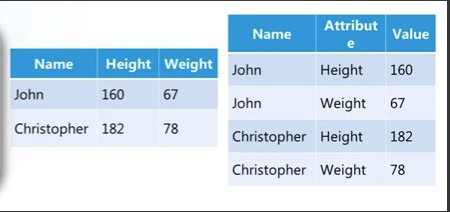

1. **Wide Format**
Each subject has a single row.

Columns represent different variables, time points, or conditions.

2. **Long Format**
Each observation has its own row.

Columns represent: one for the identifier (e.g. student), one for the variable name, and one for the value.

Use of both data formats depend upon the need (problem statement), from which data is fetched (Data source)

| Format   | Best For                                                                                         |
| -------- | ------------------------------------------------------------------------------------------------ |
| **Wide** | Easy to read manually, often used in spreadsheets                                                |
| **Long** | Preferred for plotting, grouping, statistical modeling, and `groupby` in pandas or `ggplot` in R |


### melt()

converts wide to long data format

In [68]:
pd.DataFrame({"CS":[102]}).melt()

,variable,value
0,CS,102


**Parameters:**
* var_name -> to name the variable column default->variable
* value_name -> to name the value column default->vaue
* id_vars -> Columns to keep fixed (identifier columns like Student, Date, etc.) for more than one use array 

In [69]:
pd.DataFrame({"CS":[102],"CIS":120,"ME":250}).melt(var_name="Field",value_name="Students")

,Field,Students
0,CS,102
1,CIS,120
2,ME,250


In [70]:
pd.DataFrame({
    "Branch":["CIS","CS","ME"],
    2025:[123,54,231],
    2024:[113,56,243],
    2023:[125,51,254],
}).melt(id_vars="Branch",var_name="Year",value_name="Students")

,Branch,Year,Students
0,CIS,2025,123
1,CS,2025,54
2,ME,2025,231
3,CIS,2024,113
4,CS,2024,56
5,ME,2024,243
6,CIS,2023,125
7,CS,2023,51
8,ME,2023,254


#### Use Cases of melt(
1. Preparing data for plotting (seaborn, ggplot, etc.)
2. Normalizing time series or repeated measures data
3. Reshaping survey/experimental results

In [71]:
death = pd.read_csv("05/time_series_covid19_deaths_global.csv")
confirm = pd.read_csv("05/time_series_covid19_confirmed_global.csv")

In [72]:
death.head()

,Province/State,Country/Region,Lat,Long,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,...,12/24/22,12/25/22,12/26/22,12/27/22,12/28/22,12/29/22,12/30/22,12/31/22,1/1/23,1/2/23
0,NaN,Afghanistan,33.93911,67.709953,0,0,0,0,0,0,...,7845,7846,7846,7846,7846,7847,7847,7849,7849,7849
1,NaN,Albania,41.15330,20.168300,0,0,0,0,0,0,...,3595,3595,3595,3595,3595,3595,3595,3595,3595,3595
2,NaN,Algeria,28.03390,1.659600,0,0,0,0,0,0,...,6881,6881,6881,6881,6881,6881,6881,6881,6881,6881
3,NaN,Andorra,42.50630,1.521800,0,0,0,0,0,0,...,165,165,165,165,165,165,165,165,165,165
4,NaN,Angola,-11.20270,17.873900,0,0,0,0,0,0,...,1928,1928,1928,1930,1930,1930,1930,1930,1930,1930


In [73]:
death.shape

(289, 1081)

there are thousand column b/c it is the data of three years
and it is in wide data format

In [74]:
confirm.head()

,Province/State,Country/Region,Lat,Long,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,...,12/24/22,12/25/22,12/26/22,12/27/22,12/28/22,12/29/22,12/30/22,12/31/22,1/1/23,1/2/23
0,NaN,Afghanistan,33.93911,67.709953,0,0,0,0,0,0,...,207310,207399,207438,207460,207493,207511,207550,207559,207616,207627
1,NaN,Albania,41.15330,20.168300,0,0,0,0,0,0,...,333749,333749,333751,333751,333776,333776,333806,333806,333811,333812
2,NaN,Algeria,28.03390,1.659600,0,0,0,0,0,0,...,271194,271198,271198,271202,271208,271217,271223,271228,271229,271229
3,NaN,Andorra,42.50630,1.521800,0,0,0,0,0,0,...,47686,47686,47686,47686,47751,47751,47751,47751,47751,47751
4,NaN,Angola,-11.20270,17.873900,0,0,0,0,0,0,...,104973,104973,104973,105095,105095,105095,105095,105095,105095,105095


In [75]:
death_melt = death.melt(id_vars=["Province/State","Country/Region","Lat","Long"],var_name="Date",value_name="Deaths")
death_melt

,Province/State,Country/Region,Lat,Long,Date,Deaths
0,NaN,Afghanistan,33.939110,67.709953,1/22/20,0
1,NaN,Albania,41.153300,20.168300,1/22/20,0
2,NaN,Algeria,28.033900,1.659600,1/22/20,0
3,NaN,Andorra,42.506300,1.521800,1/22/20,0
4,NaN,Angola,-11.202700,17.873900,1/22/20,0
...,...,...,...,...,...,...
311248,NaN,West Bank and Gaza,31.952200,35.233200,1/2/23,5708
311249,NaN,Winter Olympics 2022,39.904200,116.407400,1/2/23,0
311250,NaN,Yemen,15.552727,48.516388,1/2/23,2159
311251,NaN,Zambia,-13.133897,27.849332,1/2/23,4024


In [76]:
confirm_melt = confirm.melt(id_vars=["Province/State","Country/Region","Lat","Long"],var_name="Date",value_name="Confirmed")
confirm_melt

,Province/State,Country/Region,Lat,Long,Date,Confirmed
0,NaN,Afghanistan,33.939110,67.709953,1/22/20,0
1,NaN,Albania,41.153300,20.168300,1/22/20,0
2,NaN,Algeria,28.033900,1.659600,1/22/20,0
3,NaN,Andorra,42.506300,1.521800,1/22/20,0
4,NaN,Angola,-11.202700,17.873900,1/22/20,0
...,...,...,...,...,...,...
311248,NaN,West Bank and Gaza,31.952200,35.233200,1/2/23,703228
311249,NaN,Winter Olympics 2022,39.904200,116.407400,1/2/23,535
311250,NaN,Yemen,15.552727,48.516388,1/2/23,11945
311251,NaN,Zambia,-13.133897,27.849332,1/2/23,334661


In [77]:
a = confirm_melt.merge(death_melt,on=['Province/State','Country/Region','Lat','Long','Date'],how='inner')[["Country/Region","Date","Confirmed","Deaths"]]
a

,Country/Region,Date,Confirmed,Deaths
0,Afghanistan,1/22/20,0,0
1,Albania,1/22/20,0,0
2,Algeria,1/22/20,0,0
3,Andorra,1/22/20,0,0
4,Angola,1/22/20,0,0
...,...,...,...,...
311248,West Bank and Gaza,1/2/23,703228,5708
311249,Winter Olympics 2022,1/2/23,535,0
311250,Yemen,1/2/23,11945,2159
311251,Zambia,1/2/23,334661,4024


### Pivot Table

A pivot table takes rows of data and groups them based on one or more keys, then applies a summary function (like sum, mean, count) to the grouped values.

The pivot table takes simple column-wise data as input, and groups the entries into a two-dimensional table that provides a multidimensional summarization of the data.

In [78]:
import seaborn as sns

Seaborn includes several built-in toy datasets (also called sample datasets) that are perfect for learning, testing, and visualizing.

In [79]:
df = sns.load_dataset("tips")
df.head()

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


It is the dataset of a restaurant in which total_bill is in dollars, tip is in dollars, sex of the customer, smoker if the customer is or isn't, which of the week he came, which time he came and how many people they were

* pivot_table is used mostly for categorical columns like sex, smoker, day, time
* Categorical data refers to data that consists of labels or categories, rather than numbers with mathematical meaning.

**Lets suppose a question that we have to find that on average each sex pays how much ?**

In [80]:
df.groupby("sex")[["total_bill"]].mean()

C:\Users\AK\AppData\Local\Temp\ipykernel_6372\4156014264.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  df.groupby("sex")[["total_bill"]].mean()


,total_bill
sex,
Male,20.744076
Female,18.056897


**Now, smoker and non smoker males and females**

In [81]:
a = df.groupby(["sex","smoker"])[["total_bill"]].mean()
a

C:\Users\AK\AppData\Local\Temp\ipykernel_6372\1620242799.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  a = df.groupby(["sex","smoker"])[["total_bill"]].mean()


total_bill
sex    smoker            
Male   Yes      22.284500
       No       19.791237
Female Yes      17.977879
       No       18.105185

if we want it unstacked,

In [82]:
a.unstack()

total_bill           
smoker        Yes         No
sex                         
Male    22.284500  19.791237
Female  17.977879  18.105185

This become a big and for this purpose we have a function called pivot_table() 
* The pivot_table() function is used to summarize and aggregate data by rearranging it into a new table format (a “pivoted” format), similar to Excel's pivot tables.

In [83]:
df.pivot_table(index="sex",columns="smoker",values="total_bill",observed=False)
# or
pd.pivot_table(df,index="sex",columns="smoker",values="total_bill",observed=False)

smoker,Yes,No
sex,,
Male,22.284500,19.791237
Female,17.977879,18.105185


here, we got the same result with lesser code

the thing about it we have alot of flexibility 

#### aggfunc (aagfunc="mean"(default))

In [84]:
#sum
df.pivot_table(index="sex",columns="smoker",values="total_bill",observed=False,aggfunc="sum")

smoker,Yes,No
sex,,
Male,1337.07,1919.75
Female,593.27,977.68


In [85]:
#count
df.pivot_table(index="sex",columns="smoker",values="total_bill",observed=False,aggfunc="count")

smoker,Yes,No
sex,,
Male,60,97
Female,33,54


In [86]:
#std
df.pivot_table(index="sex",columns="smoker",values="total_bill",observed=False,aggfunc="std")

smoker,Yes,No
sex,,
Male,9.911845,8.726566
Female,9.189751,7.286455


In [87]:
#all columns(if we dont specify values then it will do the agg func on all the columns if dtypes not a issue)
df.pivot_table(index="sex",columns="smoker",values=["total_bill","tip","size"],observed=False,aggfunc="sum")
# here it was a issue that's why specified the same dtype columns which would give error on mean

size          tip         total_bill         
smoker  Yes   No     Yes      No        Yes       No
sex                                                 
Male    150  263  183.07  302.00    1337.07  1919.75
Female   74  140   96.74  149.77     593.27   977.68

#### Multidimensional

In [88]:
df.pivot_table(index=["sex","smoker"],values="total_bill",columns=["day","time"],observed=False)

day                 Thur               Fri                Sat        Sun
time               Lunch Dinner      Lunch  Dinner     Dinner     Dinner
sex    smoker                                                           
Male   Yes     19.171000    NaN  11.386667  25.892  21.837778  26.141333
       No      18.486500    NaN        NaN  17.475  19.929063  20.403256
Female Yes     19.218571    NaN  13.260000  12.200  20.266667  16.540000
       No      15.899167  18.78  15.980000  22.750  19.003846  20.824286

Here, we are taking multiple values to show that in a single df we can specify different agg func to the values according to our need

In [89]:
df.pivot_table(index=["sex","smoker"],values=["total_bill","tip","size"],columns=["day","time"],observed=False,aggfunc={"size":"mean","total_bill":"sum","tip":"max"})

size                                               tip  \
day                Thur              Fri              Sat       Sun  Thur   
time              Lunch Dinner     Lunch Dinner    Dinner    Dinner Lunch   
sex    smoker                                                               
Male   Yes     2.300000    NaN  1.666667    2.4  2.629630  2.600000  5.00   
       No      2.500000    NaN       NaN    2.0  2.656250  2.883721  6.70   
Female Yes     2.428571    NaN  2.000000    2.0  2.200000  2.500000  5.00   
       No      2.500000    2.0  3.000000    2.0  2.307692  3.071429  5.17   

                                                total_bill                \
day                    Fri           Sat    Sun       Thur           Fri   
time          Dinner Lunch Dinner Dinner Dinner      Lunch Dinner  Lunch   
sex    smoker                                                              
Male   Yes       NaN  2.20   4.73  10.00    6.5     191.71   0.00  34.16   
       No        NaN   NaN   3.50   9.00    6.0     369.73   0.00   0.00   
Female Yes       NaN  3.48   4.30   6.50    4.0     134.53   0.00  39.78   
       No        3.0  3.00   3.25   4.67    5.2     381.58  18.78  15.98   

                                                   
day                     Sat           Sun          
time           Dinner Lunch  Dinner Lunch  Dinner  
sex    smoker                                      
Male   Yes     129.46   0.0  589.62   0.0  392.12  
       No       34.95   0.0  637.73   0.0  877.34  
Female Yes      48.80   0.0  304.00   0.0   66.16  
       No       22.75   0.0  247.05   0.0  291.54

if we have to apply same multiple agg func to all values we can use array

In [90]:
df.pivot_table(index=["sex","smoker"],values=["total_bill","tip","size"],columns=["day","time"],observed=False,aggfunc=["max","min"])

max                                                       \
               size                                     tip                
day            Thur          Fri           Sat    Sun  Thur          Fri   
time          Lunch Dinner Lunch Dinner Dinner Dinner Lunch Dinner Lunch   
sex    smoker                                                              
Male   Yes      4.0    NaN   2.0    4.0    5.0    5.0  5.00    NaN  2.20   
       No       6.0    NaN   NaN    2.0    4.0    6.0  6.70    NaN   NaN   
Female Yes      4.0    NaN   2.0    2.0    4.0    3.0  5.00    NaN  3.48   
       No       6.0    2.0   3.0    2.0    4.0    5.0  5.17    3.0  3.00   

                      ...   min                                                \
                      ...   tip                      total_bill                 
day                   ...   Fri           Sat    Sun       Thur           Fri   
time          Dinner  ... Lunch Dinner Dinner Dinner      Lunch Dinner  Lunch   
sex    smoker         ...                                                       
Male   Yes      4.73  ...  1.58   1.50   1.00   1.50      10.34    NaN   8.58   
       No       3.50  ...   NaN   1.50   1.25   1.32       7.51    NaN    NaN   
Female Yes      4.30  ...  2.00   1.00   1.00   3.00      12.74    NaN  10.09   
       No       3.25  ...  3.00   3.25   1.00   1.01       8.35  18.78  15.98   

                                    
                                    
day                     Sat    Sun  
time          Dinner Dinner Dinner  
sex    smoker                       
Male   Yes     12.03   7.74   7.25  
       No      12.46   9.55   8.77  
Female Yes      5.75   3.07   9.60  
       No      22.75   7.25  10.29  

[4 rows x 36 columns]

#### margins parameter
the margins parameter in the pivot_table() function adds summary (total) rows and/or columns to your pivot table.

This will add:

A "All" row (at the bottom) that shows the totals/aggregates for each column

A "All" column (at the right) that shows the totals/aggregates for each row

In [91]:
df.pivot_table(index="sex",columns="smoker",values="total_bill",observed=False,aggfunc="mean",margins=True)

smoker,Yes,No,All
sex,,,
Male,22.284500,19.791237,20.744076
Female,17.977879,18.105185,18.056897
All,20.756344,19.188278,19.785943


In [92]:
df.pivot_table(index="sex",columns="smoker",values="total_bill",observed=False,aggfunc="sum",margins=True)

smoker,Yes,No,All
sex,,,
Male,1337.07,1919.75,3256.82
Female,593.27,977.68,1570.95
All,1930.34,2897.43,4827.77


* This means that margins will make row and column and do on the agg func which is given in aggfunc

In [93]:
df.pivot_table(index=["sex","smoker"],values=["total_bill","tip","size"],columns=["day","time"],observed=False,aggfunc={"size":"mean","total_bill":"sum","tip":"max"},margins=True)

size                                                 \
day                Thur              Fri                 Sat       Sun   
time              Lunch Dinner     Lunch    Dinner    Dinner    Dinner   
sex    smoker                                                            
Male   Yes     2.300000    NaN  1.666667  2.400000  2.629630  2.600000   
       No      2.500000    NaN       NaN  2.000000  2.656250  2.883721   
Female Yes     2.428571    NaN  2.000000  2.000000  2.200000  2.500000   
       No      2.500000    2.0  3.000000  2.000000  2.307692  3.071429   
All            2.459016    2.0  2.000000  2.166667  2.517241  2.842105   

                          tip               ...       total_bill         \
day                 All  Thur          Fri  ...   All       Thur          
time                    Lunch Dinner Lunch  ...            Lunch Dinner   
sex    smoker                               ...                           
Male   Yes     2.500000  5.00    NaN  2.20  ...  10.0     191.71   0.00   
       No      2.711340  6.70    NaN   NaN  ...   9.0     369.73   0.00   
Female Yes     2.242424  5.00    NaN  3.48  ...   6.5     134.53   0.00   
       No      2.592593  5.17    3.0  3.00  ...   5.2     381.58  18.78   
All            2.569672  6.70    3.0  3.48  ...  10.0    1077.55  18.78   

                                                                     
day              Fri           Sat            Sun               All  
time           Lunch  Dinner Lunch   Dinner Lunch   Dinner           
sex    smoker                                                        
Male   Yes     34.16  129.46   0.0   589.62   0.0   392.12  1337.07  
       No       0.00   34.95   0.0   637.73   0.0   877.34  1919.75  
Female Yes     39.78   48.80   0.0   304.00   0.0    66.16   593.27  
       No      15.98   22.75   0.0   247.05   0.0   291.54   977.68  
All            89.92  235.96   NaN  1778.40   NaN  1627.16  4827.77  

[5 rows x 23 columns]

* And if there are different agg funcs in multicolumn pivot table then it will do margins of each column with each agg func separately

### Plotting Graphs

In [94]:
df = pd.read_csv("05/expense_data.csv")
df.tail()

,Date,Account,Category,Subcategory,Note,INR,Income/Expense,Note.1,Amount,Currency,Account.1
272,11/22/2021 14:16,CUB - online payment,Food,NaN,Dinner,90.0,Expense,NaN,90.0,INR,90.0
273,11/22/2021 14:16,CUB - online payment,Food,NaN,Lunch with company,97.0,Expense,NaN,97.0,INR,97.0
274,11/21/2021 17:07,CUB - online payment,Transportation,NaN,Rapido,130.0,Expense,NaN,130.0,INR,130.0
275,11/21/2021 15:50,CUB - online payment,Food,NaN,Lunch,875.0,Expense,NaN,875.0,INR,875.0
276,11/21/2021 13:30,CUB - online payment,Other,NaN,Got from gobi,2000.0,Income,NaN,2000.0,INR,2000.0


In [95]:
df["Category"].value_counts()

Category
Food                156
Other                60
Transportation       31
Apparel               7
Household             6
Allowance             6
Social Life           5
Education             1
Salary                1
Self-development      1
Beauty                1
Gift                  1
Petty cash            1
Name: count, dtype: int64

In [96]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 277 entries, 0 to 276
Data columns (total 11 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Date            277 non-null    object 
 1   Account         277 non-null    object 
 2   Category        277 non-null    object 
 3   Subcategory     0 non-null      float64
 4   Note            273 non-null    object 
 5   INR             277 non-null    float64
 6   Income/Expense  277 non-null    object 
 7   Note.1          0 non-null      float64
 8   Amount          277 non-null    float64
 9   Currency        277 non-null    object 
 10  Account.1       277 non-null    float64
dtypes: float64(5), object(6)
memory usage: 23.9+ KB


Here, Date column is object so we will convert it into datetime

In [97]:
df["Date"] = pd.to_datetime(df["Date"])
df["Month"] = df["Date"].dt.month_name()
df.head()

,Date,Account,Category,Subcategory,Note,INR,Income/Expense,Note.1,Amount,Currency,Account.1,Month
0,2022-03-02 10:11:00,CUB - online payment,Food,NaN,Brownie,50.0,Expense,NaN,50.0,INR,50.0,March
1,2022-03-02 10:11:00,CUB - online payment,Other,NaN,To lended people,300.0,Expense,NaN,300.0,INR,300.0,March
2,2022-03-01 19:50:00,CUB - online payment,Food,NaN,Dinner,78.0,Expense,NaN,78.0,INR,78.0,March
3,2022-03-01 18:56:00,CUB - online payment,Transportation,NaN,Metro,30.0,Expense,NaN,30.0,INR,30.0,March
4,2022-03-01 18:22:00,CUB - online payment,Food,NaN,Snacks,67.0,Expense,NaN,67.0,INR,67.0,March


There is parameter fill_value which fills given values in plz of nan

In [100]:
pd.pivot_table(df,index="Month",columns="Category",values="INR",aggfunc="sum",fill_value=0)

Category,Allowance,Apparel,Beauty,Education,Food,Gift,Household,Other,Petty cash,Salary,Self-development,Social Life,Transportation
Month,,,,,,,,,,,,,
December,11000.0,2590.0,196.0,0.0,6440.72,0.0,4800.0,1790.0,0.0,0.0,400.0,513.72,914.0
February,0.0,798.0,0.0,0.0,5579.85,0.0,2808.0,20000.0,0.0,0.0,0.0,1800.00,5078.8
January,1000.0,0.0,0.0,1400.0,9112.51,0.0,4580.0,13178.0,0.0,8000.0,0.0,200.00,2850.0
March,0.0,0.0,0.0,0.0,195.00,0.0,0.0,900.0,0.0,0.0,0.0,0.00,30.0
November,2000.0,0.0,0.0,0.0,3174.40,115.0,0.0,2000.0,3.0,0.0,0.0,0.00,331.0


<Axes: xlabel='Month'>

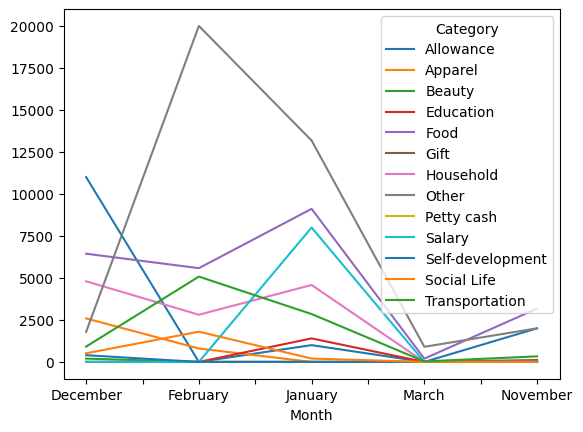

In [102]:
pd.pivot_table(df,index="Month",columns="Category",values="INR",aggfunc="sum",fill_value=0).plot()

<Axes: xlabel='Month'>

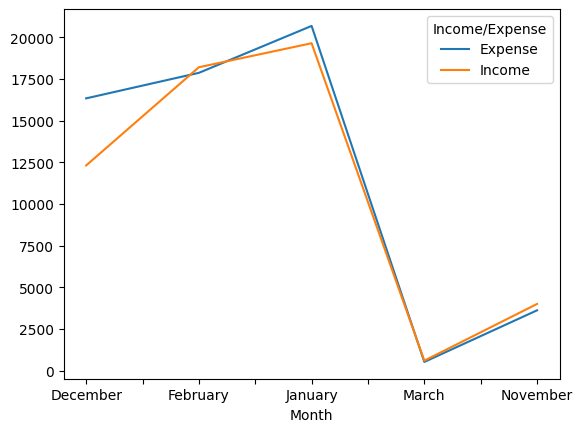

In [103]:
pd.pivot_table(df,index="Month",columns="Income/Expense",values="INR",aggfunc="sum",fill_value=0).plot()

<Axes: xlabel='Month'>

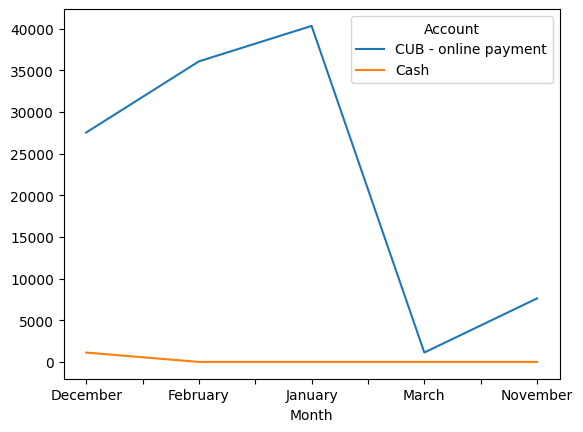

In [107]:
pd.pivot_table(df,index="Month",columns="Account",values="INR",aggfunc="sum",fill_value=0).plot()